# Practical Artificial Intelligence of Image Recognition, Spring 2023 HW4
National Taiwan University B11705009 梁安哲

In [32]:
# import modules
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [33]:
# prepare dataset & labels
from keras.utils import np_utils

(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

## Part 1: MLP model

In [34]:
# construct the MLP model with 3 128 node fully connected layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10 , activation="softmax") 
])


In [35]:
# compile the model with loss funcion: categorical crossentropy and optimizer: adam 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [36]:
# train the model with epoch:10 batch_size: 128
train_history = history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)

Epoch 1/10
313/313 [==============================] - 3s 7ms/step - loss: 1.9299 - accuracy: 0.2942 - val_loss: 1.8035 - val_accuracy: 0.3497
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 1.7451 - accuracy: 0.3728 - val_loss: 1.7160 - val_accuracy: 0.3885
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 1.6610 - accuracy: 0.4045 - val_loss: 1.6403 - val_accuracy: 0.4213
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 1.6057 - accuracy: 0.4252 - val_loss: 1.5778 - val_accuracy: 0.4393
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 1.5617 - accuracy: 0.4401 - val_loss: 1.5542 - val_accuracy: 0.4437
Epoch 6/10
313/313 [==============================] - 1s 5ms/step - loss: 1.5365 - accuracy: 0.4473 - val_loss: 1.5658 - val_accuracy: 0.4380
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5148 - accuracy: 0.4578 - val_loss: 1.5317 - val_accuracy: 0.4571
Epoch 

In [37]:
import matplotlib.pyplot as plt
# functions for data visualization
def show_acc_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [38]:
def show_loss_train_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

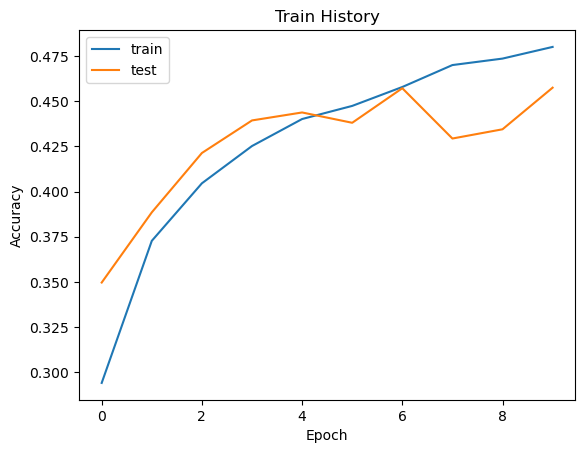

In [39]:
show_acc_train_history('accuracy','val_accuracy')

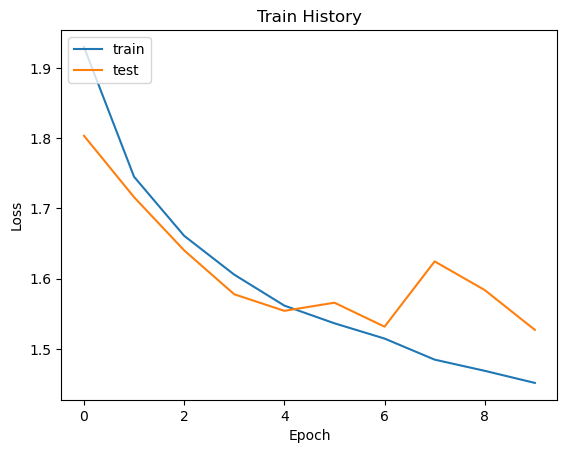

In [40]:
show_loss_train_history('loss','val_loss')

## Part 2: CNN model

In [41]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.1),
])
# construct the CNN model with data_augmentation
model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10 , activation="softmax") 
])

In [42]:
# compile the model with loss funcion: categorical crossentropy and optimizer: adam 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [43]:
# train the model with epoch:10 batch_size: 64
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=64, verbose=1)

Epoch 1/10
625/625 [==============================] - 12s 15ms/step - loss: 1.7878 - accuracy: 0.3409 - val_loss: 1.5190 - val_accuracy: 0.4411
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 1.5063 - accuracy: 0.4514 - val_loss: 1.3935 - val_accuracy: 0.4939
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 1.4001 - accuracy: 0.4981 - val_loss: 1.3142 - val_accuracy: 0.5297
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 1.3166 - accuracy: 0.5293 - val_loss: 1.2838 - val_accuracy: 0.5464
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 1.2551 - accuracy: 0.5510 - val_loss: 1.1902 - val_accuracy: 0.5847
Epoch 6/10
625/625 [==============================] - 9s 15ms/step - loss: 1.2067 - accuracy: 0.5685 - val_loss: 1.2346 - val_accuracy: 0.5654
Epoch 7/10
625/625 [==============================] - 9s 15ms/step - loss: 1.1527 - accuracy: 0.5893 - val_loss: 1.1490 - val_accuracy: 0.599

In [44]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_20 (Dense)            (None, 2048)              33556480  
                                                      

This is the architecture of our model.

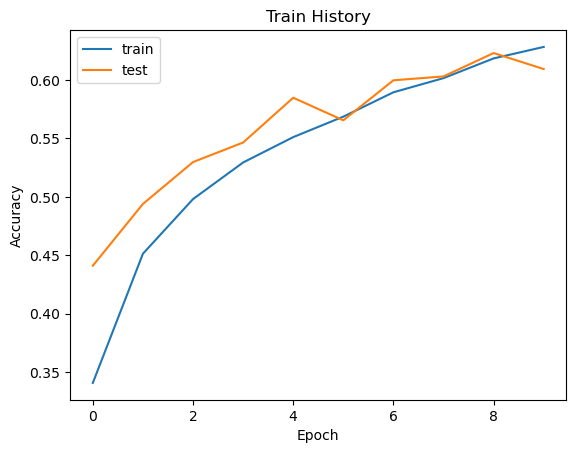

In [45]:
show_acc_train_history('accuracy','val_accuracy')

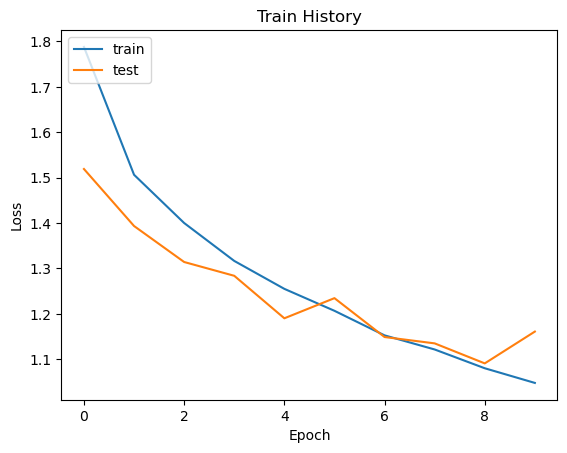

In [46]:
show_loss_train_history('loss','val_loss')

We can see that our CNN model outperform the MLP model (62% v.s. 48%), and from the accuracy graph, we can see that data augmentation makes our model less prone to overfitting.